<a href="https://colab.research.google.com/github/Sarthak-Sure06/Bank-Solution/blob/main/BankChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
## Context:
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time.
#This manifests within the data in various forms such as the recency of account actions or change in the account balance

In [79]:
## Aim:
### We aim to accomplist the following for this study:

#- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

#- Classify if a customer is going to churn or not
#- Preferably and based on model performance, choose a model that will attach a probability
# to the churn to make it easier for customer service to target low hanging fruits in their
# efforts to prevent churn

In [80]:
## We will be using ANN models and H2O Auto ML in this project

In [81]:
## Time Line of the Project:
#- Data Analysis
#- Feature Engineering
#- Model Building using ANN
#- Model Building and Prediction using H2O Auto ML

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df = pd.read_csv("drive/MyDrive/Data/Churndata.csv")

In [85]:
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [86]:
#AS few of the coloums are not necessary and might affect our analysis and model training
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [87]:
df.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [88]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [89]:
#Data Analysis

In [90]:
df.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [91]:
df.nunique()
#The data tell us about the count of all unique values in the particular coloum
# Important
 # -- only 3 geography location i.e France , Spain & Germany
 # -- Dataset is vast for age as there are total 70 unique age
 # -- Exited value is 1 is Churned/left and 0 if not.
 # -- Similarly Active member value is 1 if active otherwise 0.

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [92]:
## We will plot a Pie Chart

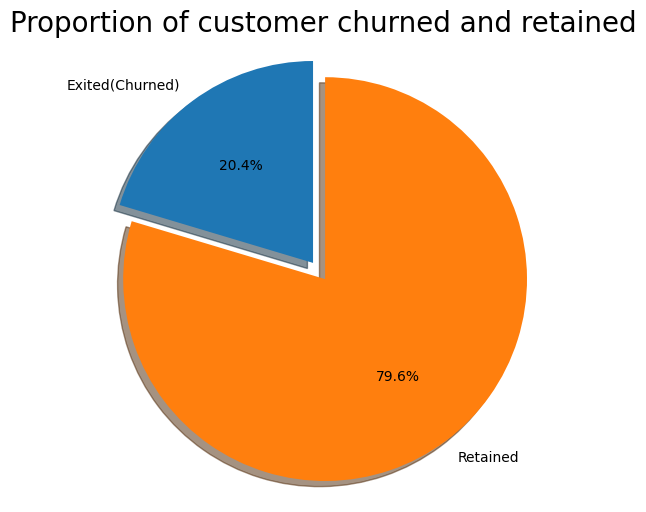

In [93]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

#These pie chart beautifully show us the percentage of people churned/left
#Thus we can focus our analysis of the 20.4% who left to find why they left
#Also predict if any other customer from the rest 79.6% are showing the same pattern

<Axes: xlabel='IsActiveMember', ylabel='count'>

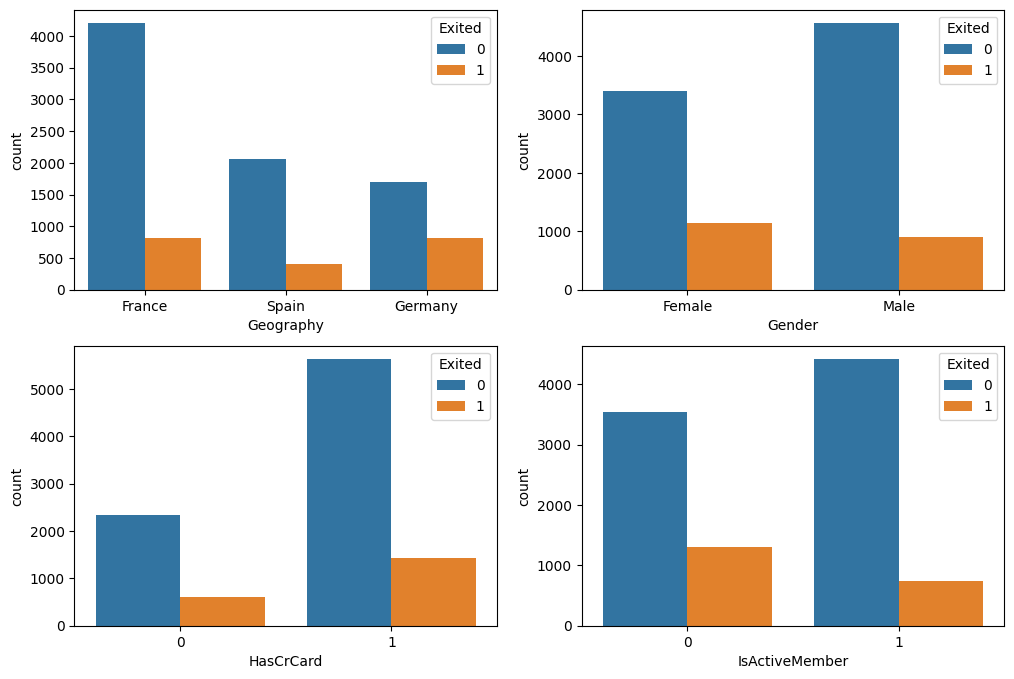

In [94]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
    sb.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sb.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sb.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sb.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Geography', ylabel='count'>

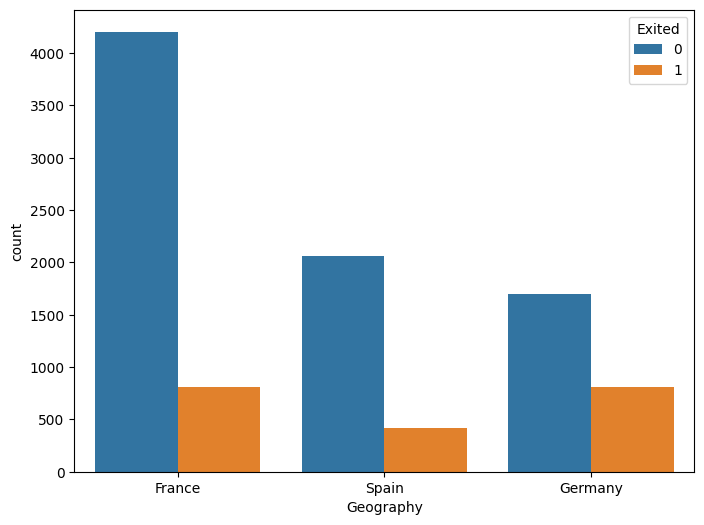

In [95]:
fig, axarr = plt.subplots(1, 1, figsize=(8, 6))
sb.countplot(x='Geography', hue = 'Exited',data = df)

## 1 geography graph
    # It shows us that france has max population the data around 4000 and
    # churn value around 600 thus has min churn ratio

    # While germany has the higest churn ratio with min population around 1500
    # and churn value around 1000

<Axes: xlabel='Gender', ylabel='count'>

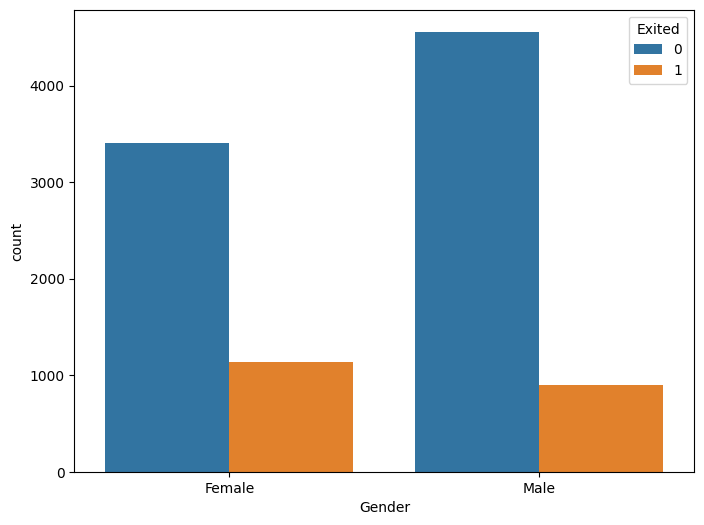

In [96]:
fig, axarr = plt.subplots(1,1,figsize=(8, 6))
sb.countplot(x='Gender', hue = 'Exited',data = df)

## 2 Gender
# As found the churn/left ration in female is more than male
# Population of females are also less thn males with around 3500
# and that of males near 5000


<Axes: xlabel='HasCrCard', ylabel='count'>

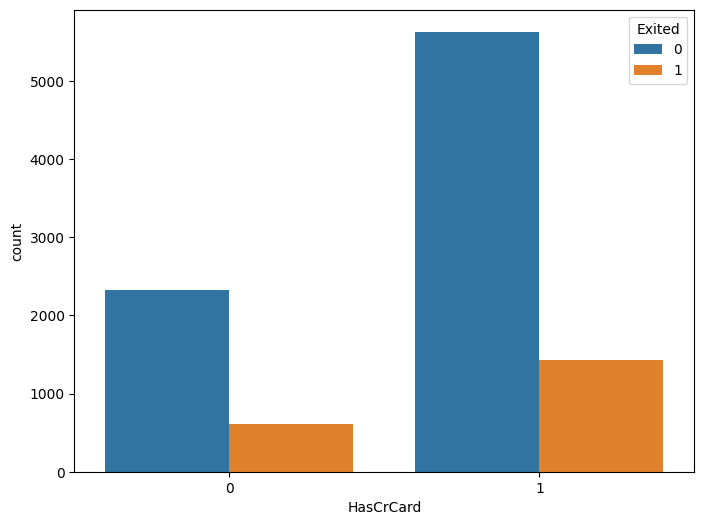

In [97]:
fig, axarr = plt.subplots(1, 1, figsize=(8, 6))
sb.countplot(x='HasCrCard', hue = 'Exited',data = df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

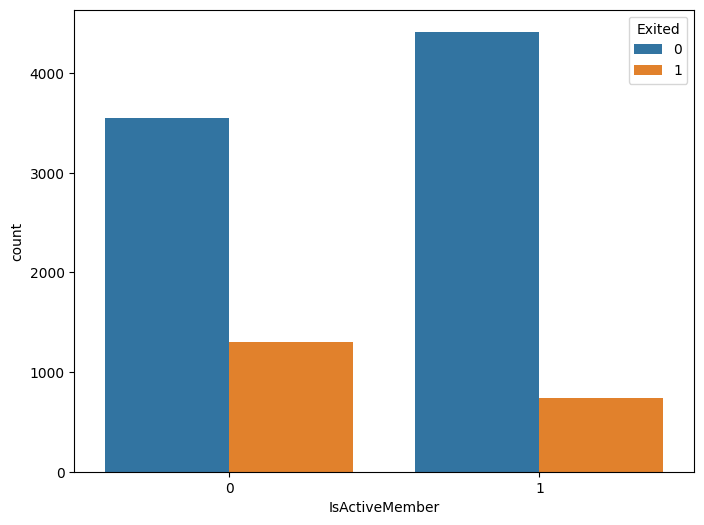

In [98]:
fig, axarr = plt.subplots(1, 1, figsize=(8, 6))
sb.countplot(x='IsActiveMember', hue = 'Exited',data = df)


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

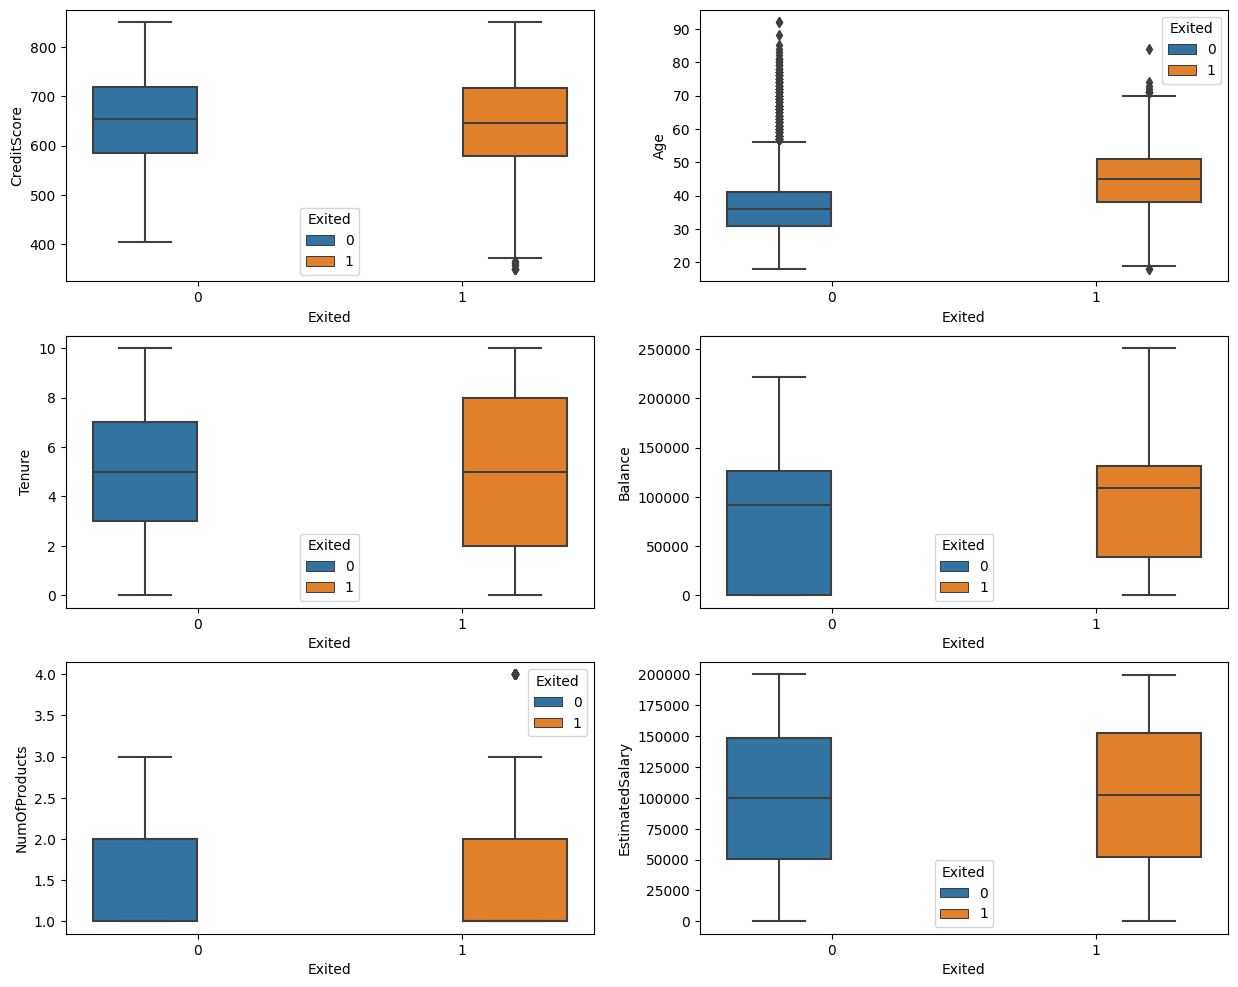

In [99]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(15, 12))
sb.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sb.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sb.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sb.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sb.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sb.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

#It can be said that only AGE and Tenure coloum has significant difference and odd data to start our analysis
# As people with more tenure or has been with bank more is leaving rather than new one

<Axes: xlabel='Exited', ylabel='Age'>

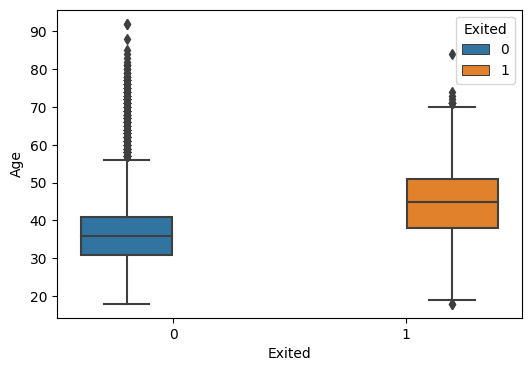

In [100]:
fig, axarr = plt.subplots(1, 1, figsize=(6, 4))
sb.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

<Axes: xlabel='Exited', ylabel='Tenure'>

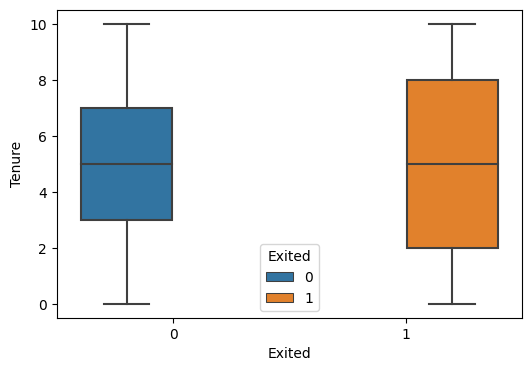

In [101]:
fig, axarr = plt.subplots(1, 1, figsize=(6, 4))
sb.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)

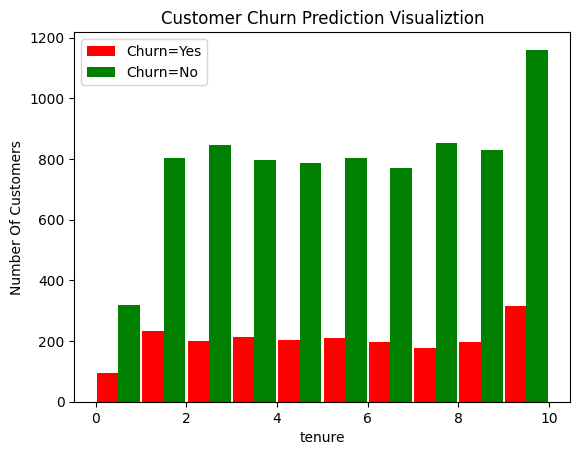

In [102]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [103]:
## Feature Engineering

In [104]:
### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

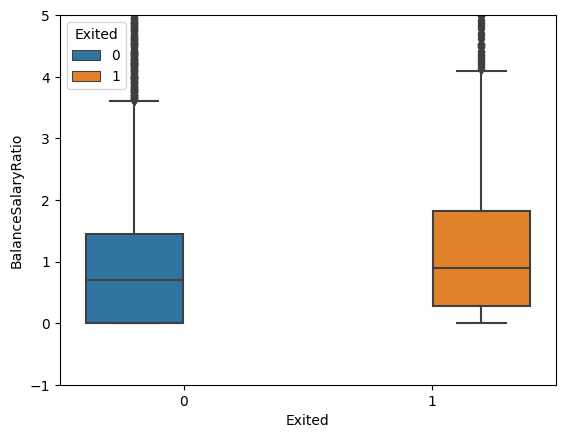

In [105]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sb.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

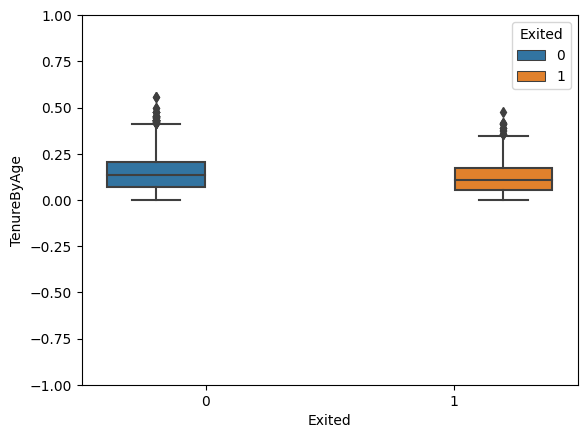

In [106]:
df['TenureByAge'] = df.Tenure/(df.Age)
sb.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [107]:
#### Printing the categorical variables

In [108]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [109]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [110]:
### Label Encoding

In [124]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [112]:
### One Hot Encoding method

In [123]:
#it will separate the coloums with 3 geographical location present
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head(7)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0.759604,0.181818,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0.000000,0.140000,1,0,0


In [114]:
#The problem with the neural netwok model is that we cant feed it the data with huge variations
# such as credit score with 460 unique value , balance range from 0 to more than 1 lakhs
#thus we have to scale them
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [115]:
df1.head(7)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1
5,0.590,1,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1,0.759604,0.181818,0,0,1
6,0.944,1,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0,0.000000,0.140000,1,0,0


In [116]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [117]:
len(X_train.columns)

14

In [118]:
## Model Building and Prediction

In [119]:
## The Sequential model

In [120]:
### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [121]:
## A Sequential model is not appropriate when:

#-Your model has multiple inputs or multiple outputs
#-Any of your layers has multiple inputs or multiple outputs
#-You need to do layer sharing
#-You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [136]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12 , input_shape=(None,32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.6241 - accuracy: 0.7347
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.7921
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7959
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.7968
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8000
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8066
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8166
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8196
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4764 - accura

In [137]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8505


[0.354936808347702, 0.8504999876022339]

In [138]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 4ms/step


array([[0.02784799],
       [0.0834761 ],
       [0.05151472],
       ...,
       [0.01324045],
       [0.01115167],
       [0.06177692]], dtype=float32)

In [ ]:
### Converting our predictions to 0,1 to check accuracy

In [139]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [140]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
### Checking the accuracy

In [141]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.41      0.53       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

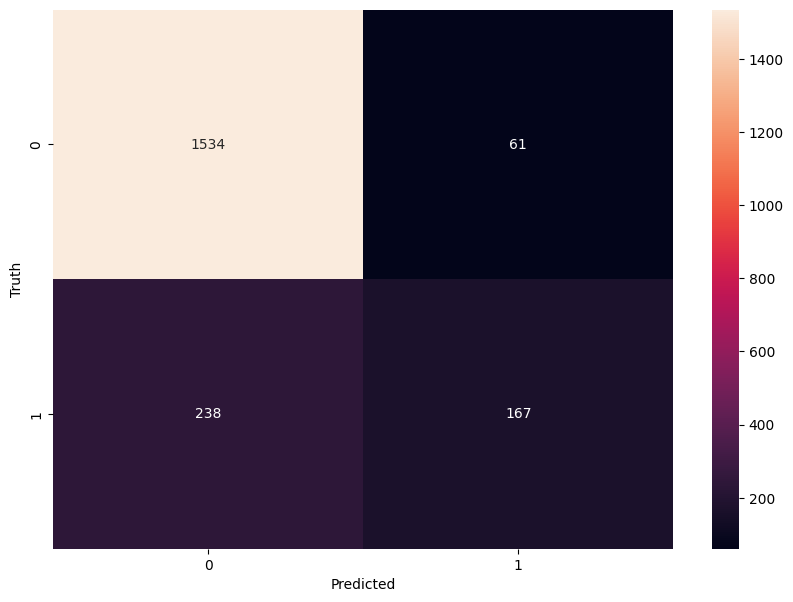

In [142]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  85.05 %
